In [16]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

In [17]:
#Carga de CSVs
train_df = pd.read_csv("../Preprocesamiento/train_preproc.csv",sep=',',encoding='UTF-8')

In [18]:
X = train_df.iloc[:,:-1]
Y = train_df['Reached.on.Time_Y.N'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42) 

La mejor cantidad de vecinos para el modelo es de 1 ya que requiere de menos proceso y tiene mejor recall que cantidades mayores de vecinos.

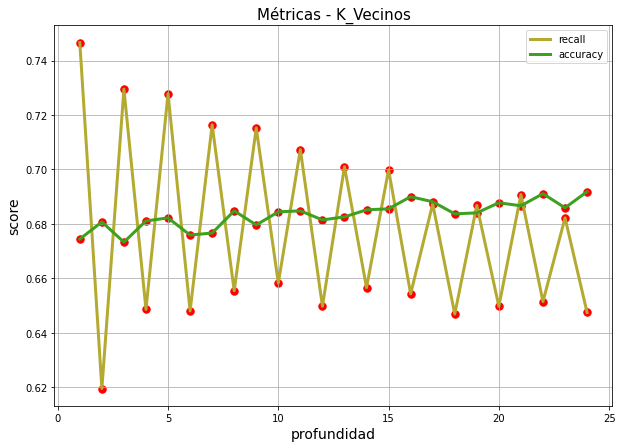

El mayor recall es de:  0.7465831435079726 
Con una cantidad de vecinos de: 1

La mayor precisión es de:  0.6918518518518518 
Con una cantidad de vecinos de: 24


In [19]:
#Creamos el registro de scores para el árbol de decision
profundidad = []
recall_ = []
accura_ = []
for i in range(1,25):
    #print()
    clf = KNeighborsClassifier(n_neighbors=i)
    # Entrenamos
    clf.fit(X_train,y_train)
    # Predecimos
    y_pred = clf.predict(X_test)
    # Evaluamos
    score = recall_score(y_test,y_pred)
    recall_.append(score)
    score = accuracy_score(y_test,y_pred)
    accura_.append(score)
    profundidad.append(i)

#Graficamos
plt.figure(figsize=(10,7))
plt.title('Métricas - K_Vecinos', fontsize=15)

plt.plot(profundidad,recall_, lw=3,label='recall',c='#B4AA31')
plt.scatter(profundidad, recall_,s=55,c='r')



plt.scatter(profundidad, accura_,s=55,c='r')
plt.plot(profundidad,accura_, lw=3,label='accuracy',c='#3CA11F')

plt.ylabel('score',fontsize=14)
plt.xlabel('profundidad',fontsize=14)
plt.legend()
plt.grid()
plt.show()

prof_max_recall = 0
prof_max_accur = 0
for i in range(0,len(profundidad)): 
    if recall_[i] ==  np.asarray(recall_).max():
        prof_max_recall = i + 1
    if accura_[i] == np.asarray(accura_).max():
        prof_max_accur = i + 1

print("El mayor recall es de: ", np.asarray(recall_).max(),'\nCon una cantidad de vecinos de:', prof_max_recall)
print("\nLa mayor precisión es de: ", np.asarray(accura_).max(),'\nCon una cantidad de vecinos de:', prof_max_accur)

In [20]:
# Hyperparameter search space
search_space = {
    'n_neighbors': np.arange(1,25)
}

In [21]:
# Probamos la estrategia grid search
from sklearn.model_selection import GridSearchCV #cv: cross validation

# Le pasamos la grilla que creamos
model = GridSearchCV(clf, param_grid=search_space, cv=4)

# Entrenamos
model.fit(X_train,y_train)

print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

Mejores hiperparámetros: {'n_neighbors': 22}
Mejor Score: 0.6832838183981768



In [22]:
#Escojemos los campos con mayor relevancia para entrenar
#ver Correlación.ipynb
entrenamiento = train_df.iloc[:,:-1]

#entrenamiento = train_df.loc[:,['Discount_offered','Weight_in_gms','Prior_purchases']]

# Instanciamos un objeto de la clase DecisionTreeClassifier
#clf = DecisionTreeClassifier(max_depth = 3, random_state = 42) 

clf = KNeighborsClassifier(n_neighbors=1)
# Entrenamos
clf.fit(entrenamiento.values,train_df['Reached.on.Time_Y.N'].values)
# Predecimos para el dataset de entrenamiento
y_pred = clf.predict(entrenamiento.values)
# Vemos la sensibilidad o recall.
print(recall_score(train_df['Reached.on.Time_Y.N'].values,y_pred))
# Vemos la precisión.
print(accuracy_score(train_df['Reached.on.Time_Y.N'].values,y_pred))

1.0
1.0


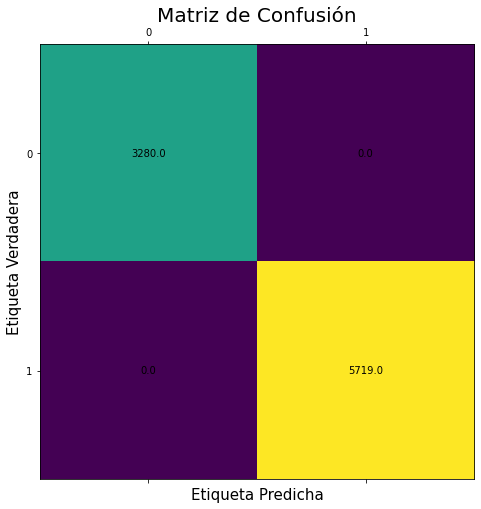

In [23]:
# Matriz de confusión 
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(train_df['Reached.on.Time_Y.N'].values, y_pred)

fig, ax = plt.subplots(figsize=(12,8))
ax.matshow(cm)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
for (i, j), z in np.ndenumerate(cm):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

In [41]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


#Carga de CSVs
train_df = pd.read_csv("../Preprocesamiento/train_preproc.csv",sep=',',encoding='UTF-8')
test_df = pd.read_csv("../Preprocesamiento/test_preproc.csv",sep=',',encoding='UTF-8')

X = train_df.iloc[:,:-1]
Y = train_df['Reached.on.Time_Y.N'].values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42) 

clf = KNeighborsClassifier(n_neighbors=1)
# Entrenamos
clf.fit(X_train,y_train)
# Predecimos para el dataset de entrenamiento
y_pred = clf.predict(X_test)
# Vemos la sensibilidad o recall.
print('recall:',recall_score(y_test,y_pred))
# Vemos la precisión.
print('accuracy:',accuracy_score(y_test,y_pred))
# Predecimos para la data test
entrenamiento_test = test_df.iloc[:,:]
y_pred_test = clf.predict(entrenamiento_test) #Predice valores para la subtabla pred_test
#Exportamos
salida = pd.DataFrame(y_pred_test)
salida.to_csv('MarcosBernard1.csv',index=False)

recall: 0.7465831435079726
accuracy: 0.6744444444444444
